In [1]:
# install dependencies if needed
%pip install graphviz statsmodels 'pymc>=5'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 403.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 1.9 MB/s eta 0:00:0000:010:01
  Obtaining dependency information for pymc>=5 from https://files.pythonhosted.org/packages/f8/19/6b48161fc06f630bf60f3534fbe7fe2db153c77d2ee7ec631a805be2e91d/pymc-5.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.18 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy!=1.9.2,>=1.4 from https://files.pythonhosted.org/packages/14/f2/10fa23f0a6b9b2439c01579ae4a9b1849d4822e972515c8f92584bfda5e9/scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for pandas>=1.0

# Introduction

## Linear Regression

The model is defined like so:
$$
y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + ... + \beta_n x_{i,n} + \epsilon_i
$$
where $\beta_0$ is also known as "intercept", and $\epsilon_i$ are all i.i.d.

In a matrix form:
$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}
$$

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
mtcars = sm.datasets.get_rdataset("mtcars").data
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
ols = smf.ols(formula='mpg ~ cyl + hp + wt', data=mtcars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     50.17
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.18e-11
Time:                        17:34:23   Log-Likelihood:                -72.738
No. Observations:                  32   AIC:                             153.5
Df Residuals:                      28   BIC:                             159.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7518      1.787     21.687      0.000      35.092      42.412
cyl           -0.9416      0.551     -1.709      0.098      -2.070       0.187
hp            -0.0180      0.012     -1.519      0.140      -0.042       0.006
wt            -3.1670      0.741     -4.276      0.000      -4.684      -1.650
==============================================================================
Omnibus:                        5.519   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.220
Skew:                           0.870   Prob(JB):                        0.121
Kurtosis:                       3.369   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 

# Bayesian Statistics

## Bayes' Rule

Thomas Bayes (1702–1761), a Presbyterian minister, and amateur mathematician, was the first who derived the Bayes’ theorem, which was published (posthumously) in 1763. However, one of the first people to really develop Bayesian methods was Pierre-Simon Laplace (1749–1827).

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

$$
P(A|B) \propto P(B|A) P(A)
$$

The probability $P(A|B)$ is called the _posterior_ (distribution), $P(B|A)$ – the _likelihood_, $P(A)$ – the _prior_, and $P(B)$ – the _marginal likelihood_.

In the case of statistical analysis when we're building some model (a distribution) defined by a vector of parameters $\mathbf{\theta}$,
and we want to fit this model to the data $\mathbf{X}$ (i.e. estimate the model's parameters), we can write

$$
P(\mathbf{\theta}|\mathbf{X}) = \frac{P(\mathbf{X}|\mathbf{\theta}) P(\mathbf{\theta})}{P(\mathbf{X})}
$$
And again, as long as we're given some particular data set $\mathbf{X}$, it's probability is fixed, thus
$$
P(\mathbf{\theta}|\mathbf{X}) \propto P(\mathbf{X}|\mathbf{\theta}) P(\mathbf{\theta})
$$

### A Few Words About Priors

- [Bernstein–von Mises theorem](https://en.wikipedia.org/wiki/Bernstein%E2%80%93von_Mises_theorem)
- Conjugate Priors, Uninformative Priors
- How many layers for a NN anyway? 😂

## Probabilistic Programming

> Programs that run both forwards and backwards! 😁


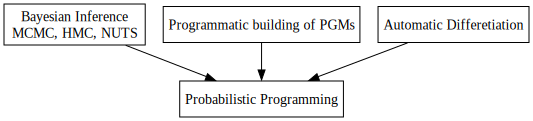

In [38]:
import graphviz

pp_graph = '''
digraph {
  node [shape="box"];

  BI  [label="Bayesian Inference\nMCMC, HMC, NUTS"];
  PGM [label="Programmatic building of PGMs"];
  AD  [label="Automatic Differetiation"];
  PP  [label="Probabilistic Programming"];

  BI  -> PP;
  PGM -> PP;
  AD  -> PP;
}
'''

pp_diag = graphviz.Source(pp_graph)
pp_diag

### Bayesian Inference

- Bayesian Update
- Markov Chain Monte-Carlo (MCMC)
    - Hamiltonian Monte-Carlo (HMC), gradient-based
        - No U-Turn Sampler (NUTS), autotuning
    - Metropolis–Hastings, gradient-free


### Probabilistic Graphical Models

- API
- DSL
- `if-then-else`! 😄


### Automatic Differentiation

AKA Algorithmic Differentiation AKA AutoGrad 😁


## Bayesian Linear Regression

Recall the linear regression equation:

$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}
$$

Assuming the error term follows a Gaussian distribution (which is not required, but handy to work with), we can write

$$
\mathbf{y} \sim \mathbf{X} \mathbf{\beta} + \mathcal{N}(0, \sigma^2)
$$
which is equivalent to
$$
\mathbf{y} \sim \mathcal{N}(\mathbf{X} \mathbf{\beta}, \sigma^2)
$$

To employ Bayesian inference we need to put some priors on $\sigma^2$, which must be non-negative, and $\mathbf{\beta}$, say,
$$
\sigma^2 \sim |\mathcal{N}(0, 10)|
$$
$$
\mathbf{\beta} \sim \mathcal{N}(0, 20)
$$

In [9]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

import pymc as pm
from pymc import HalfCauchy, Model, Normal, sample

In [10]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [13]:
# Split data into vectors for simplicity
wt = mtcars.wt
hp = mtcars.hp
cyl = mtcars.cyl
mpg = mtcars.mpg

In [14]:
with Model() as blm:
    # mpg ~ cyl + hp + wt
    # Define priors
    intercept = Normal("Intercept", 0, sigma=20)
    slope_wt = Normal("slope_wt", 0, sigma=20)
    slope_hp = Normal("slope_hp", 0, sigma=20)
    slope_cyl = Normal("slope_cyl", 0, sigma=20)
    
    sigma = HalfCauchy("sigma", beta=10)

    # Define likelihood
    likelihood = Normal("mpg", mu=intercept + slope_wt*wt + slope_hp*hp + slope_cyl*cyl, sigma=sigma, observed=mpg)

    # Draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slope_wt, slope_hp, slope_cyl, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 800 seconds.


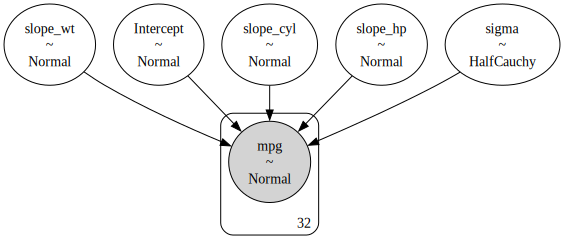

In [37]:
pm.model_to_graphviz(blm)

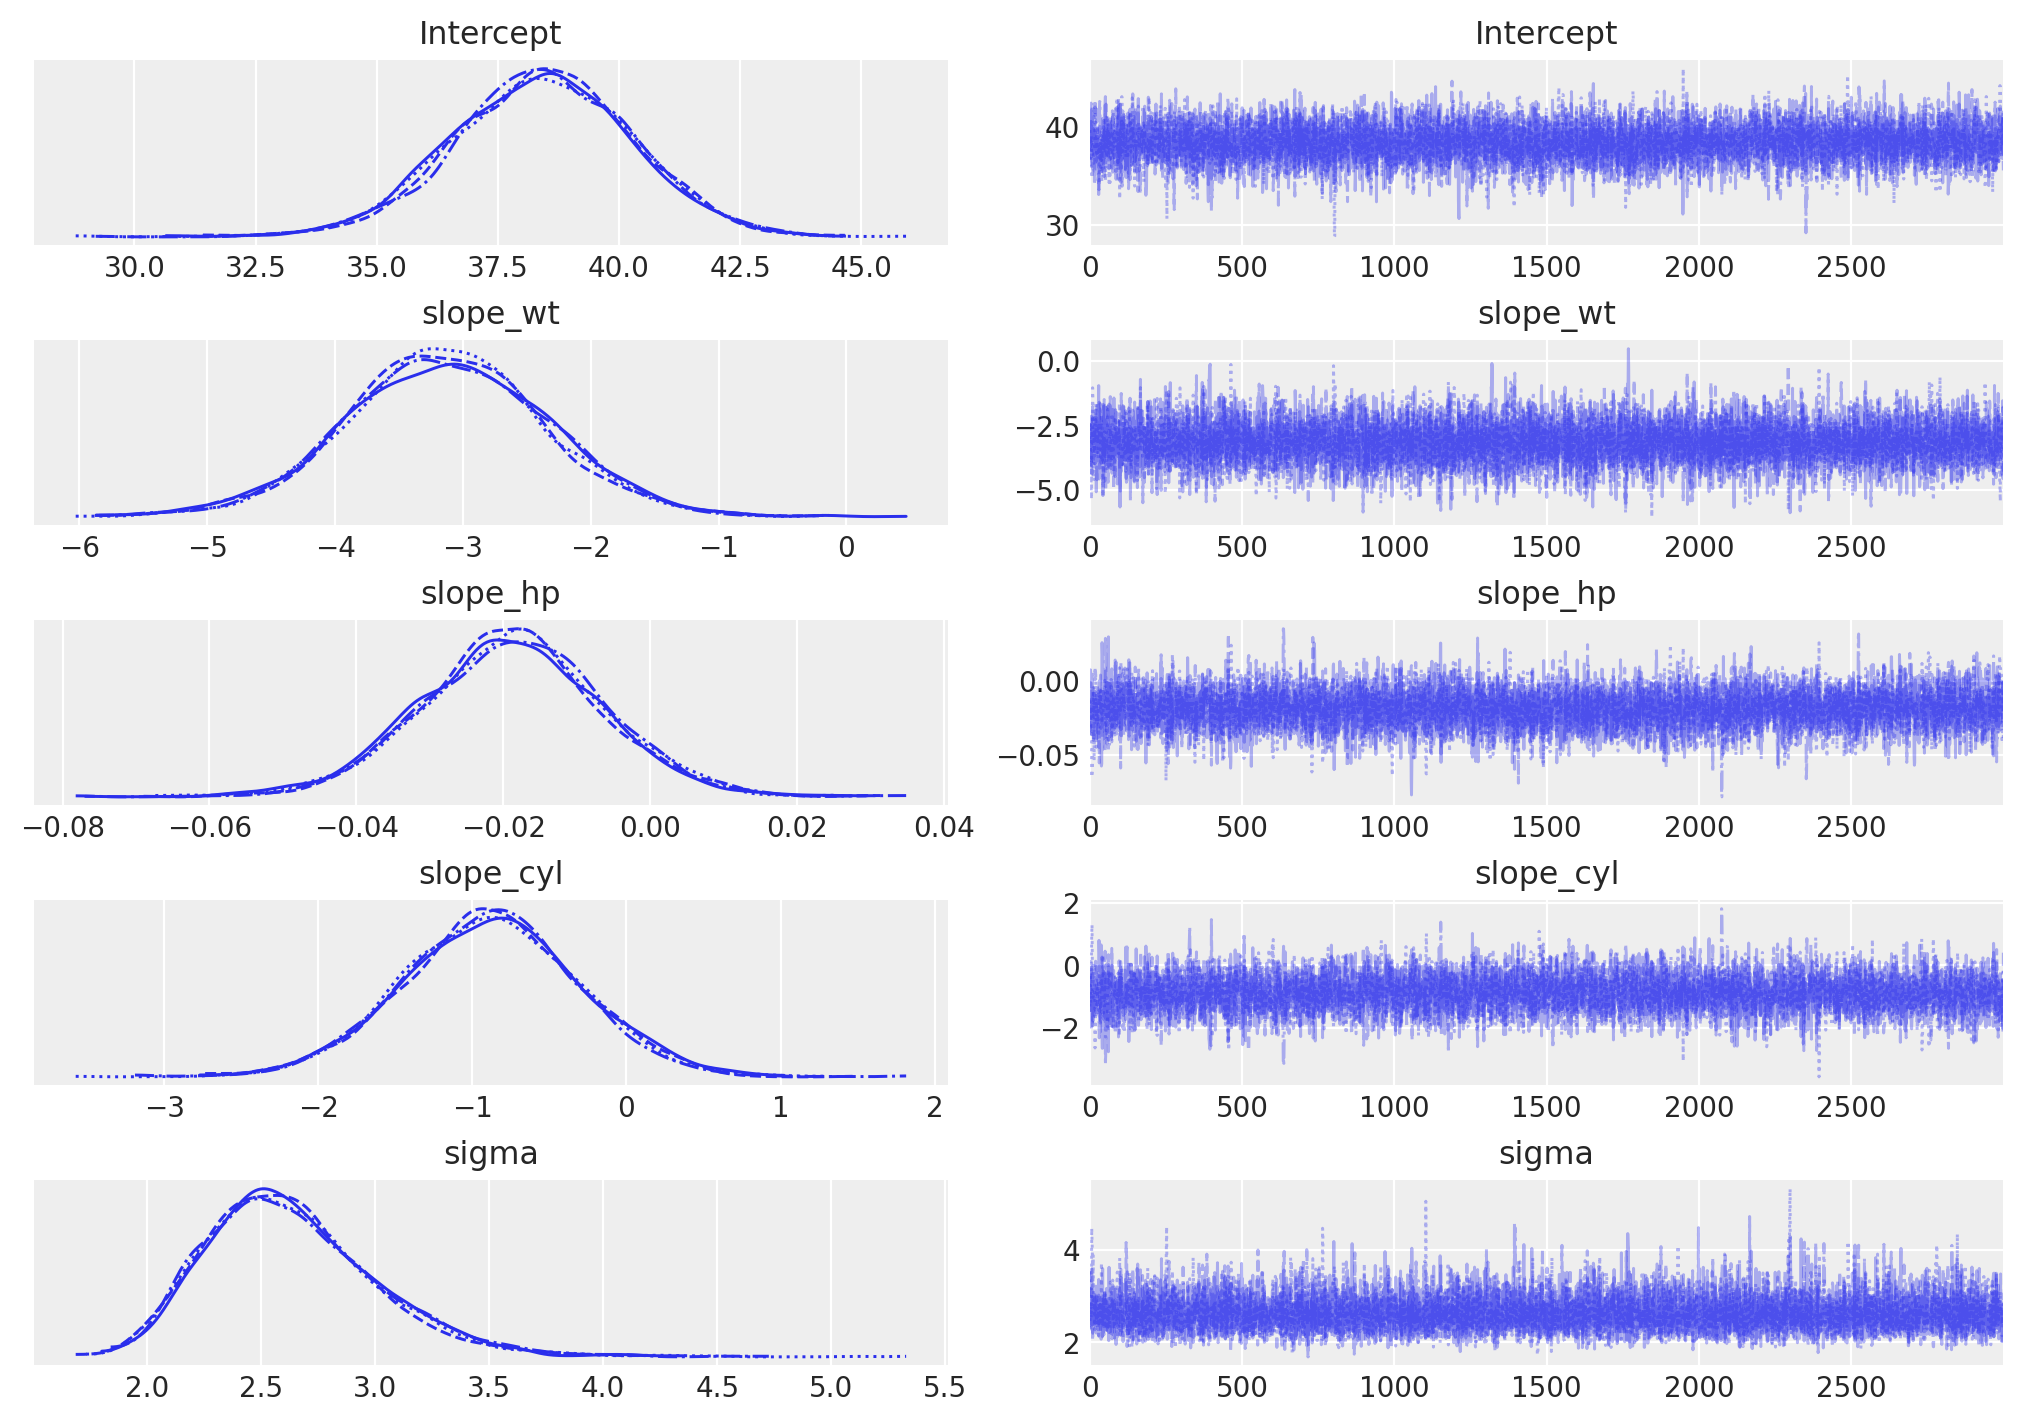

In [15]:
az.plot_trace(idata, figsize=(10, 7));

In [35]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,38.41,1.86,35.10,42.05,0.02,0.02,6365.90,7380.04,1.0
slope_wt,-3.14,0.78,-4.58,-1.62,0.01,0.01,7575.31,7112.00,1.0
slope_hp,-0.02,0.01,-0.04,0.00,0.00,0.00,5772.61,6816.36,1.0
slope_cyl,-0.88,0.57,-2.00,0.15,0.01,0.01,4962.26,5865.14,1.0
sigma,2.63,0.38,1.99,3.33,0.00,0.00,7307.91,7277.29,1.0


In [28]:
CHAIN = 0

In [30]:
idata.posterior['Intercept'][CHAIN].size

3000

In [31]:
idata.posterior['Intercept'][CHAIN].mean().item()

38.34126143230395

In [32]:
idata.posterior['slope_wt'][CHAIN].mean().item()

-3.122251109940389

In [33]:
idata.posterior['slope_hp'][CHAIN].mean().item()

-0.019463067380917954

In [34]:
idata.posterior['slope_cyl'][CHAIN].mean().item()

-0.8673117704135329

# Further Directions

- Logistic Regression 😄
- Hierarchical Models
- Differential Equations?! 😱
- Model Analysis
- MCMC Implementation
- Causal Inference
    - Instrumental Variables?
    - Difference-in-Differences???
    - Causal Graphs??! 😱

